In [211]:
# OBJETIVO DO NOTEBOOK
# 1º Normalizar dados númericos e categóricos
# 2º Caslibrar o número de grupos para o cluster (Otimização)
# 3º Treinar o modelo de cluster 
# 4º Descrever os grupos de modelo de cluster (Centróides)
# 5º Definir a qual grupo uma nova instância pertence

###########################################
# TRABALHO DE NORMALIZAÇÃO
# Data Since: 07/04/2023
# @Autor: Santian

!python.exe -m pip install --upgrade pip
!pip install pandas==1.5.2
!pip install matplotlib
!pip install scikit-learn

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\python311\\lib\\site-packages\\pip-22.3.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [212]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from pickle import dump, load
scaler = StandardScaler()

ABRE O ARQUIVO E REALIZA A LEITURA DO MESMO

In [213]:
# LE O ARQUIVO
dataframe = pd.read_csv('codon_usage.csv\codon_usage.csv', sep=',')
# IMPRIME AS 5 PRIMEIRAS LINHAS
dataframe

C:\Users\Aluno\AppData\Local\Temp\ipykernel_4024\988259200.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('codon_usage.csv\codon_usage.csv', sep=',')


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [214]:
# Verifica quais colunas são categóricas
colunas_categoricas = [coluna for coluna in dataframe.columns if dataframe[coluna].dtype == 'object']

colunas_categoricas

['Kingdom', 'SpeciesName', 'UUU', 'UUC']

In [215]:
normalizador = preprocessing.MinMaxScaler()

# converte as colunas 'UUU' e 'UUC' para numérico, com valores inválidos convertidos para NaN
dataframe['UUU'] = pd.to_numeric(dataframe['UUU'], errors='coerce')
dataframe['UUC'] = pd.to_numeric(dataframe['UUC'], errors='coerce')

# preenche valores faltantes com a média para colunas numéricas
df_num = dataframe.select_dtypes(include=['float64', 'int64'])
df_num = df_num.fillna(df_num.mean())

# Obter o modelo normalizador e salvar para uso posterior
modelo_normalizador = normalizador.fit(df_num) # O método fit é responsável por obter o modelo que normalizará a base 
dados_num_normalizado = normalizador.fit_transform(df_num) # Responsável por aplicar a normalização

#alternativa
dados_num_normalizado = modelo_normalizador.fit_transform(df_num)

#Salvar o modelo normalizador em disco
dump(modelo_normalizador,open('normalizador1.model','wb'))

# preenche valores faltantes com a moda para colunas categóricas
df_cat = dataframe.select_dtypes(include=['object'])
df_cat = df_cat.fillna(df_cat.mode().iloc[0])

df_num

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,100217,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0,100220,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0,100755,4862,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0,100880,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0,100887,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0,9601,1097,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,1,9601,2067,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,1,9602,1686,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,0,9606,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [216]:
# normaliza os dados numéricos
df_num = df_num.select_dtypes(include=['float64','int64'])
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# normaliza os dados categóricos
df_cat = df_cat[['Kingdom']]
df_cat = pd.get_dummies(df_cat)

# concatena as duas partes do dataset
dataframe = pd.concat([df_num, df_cat], axis=1)
# imprime o dataset final
dataframe

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,Kingdom_bct,Kingdom_inv,Kingdom_mam,Kingdom_phg,Kingdom_plm,Kingdom_pln,Kingdom_pri,Kingdom_rod,Kingdom_vrl,Kingdom_vrt
0,-0.533192,-0.242295,-0.107842,-0.469636,-0.983900,-0.972411,-1.141708,-0.546975,0.946505,-0.744101,...,0,0,0,0,0,0,0,0,1,0
1,-0.533192,-0.242271,-0.108566,0.131756,-0.851122,-0.963719,-0.789316,-1.298923,0.700139,-0.701214,...,0,0,0,0,0,0,0,0,1,0
2,-0.533192,-0.237983,-0.103858,-0.288084,-0.141536,-0.341257,0.142853,-0.944676,-0.492577,-0.361413,...,0,0,0,0,0,0,0,0,1,0
3,-0.533192,-0.236982,-0.107953,-0.400987,-0.085494,-0.214737,-0.450934,-0.203120,-0.323072,-0.397703,...,0,0,0,0,0,0,0,0,1,0
4,-0.533192,-0.236925,-0.078890,0.189626,-0.839051,-0.626170,2.444716,-0.379771,-0.878940,-0.590284,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,-0.533192,-0.968488,-0.109089,0.039845,1.043980,-0.732408,-0.046814,-0.478015,0.184073,-0.447188,...,0,0,0,0,0,0,1,0,0,0
13024,0.918820,-0.968488,-0.107742,-0.694307,0.731866,-0.038477,-0.842121,-0.312700,2.397254,2.366889,...,0,0,0,0,0,0,1,0,0,0
13025,0.918820,-0.968480,-0.108271,-0.600695,0.842227,-0.194455,-1.136320,-0.618769,2.205102,3.177214,...,0,0,0,0,0,0,1,0,0,0
13026,-0.533192,-0.968448,56.390828,-0.411199,-0.272590,-0.626170,-0.126560,-0.437395,0.089369,-0.490488,...,0,0,0,0,0,0,1,0,0,0


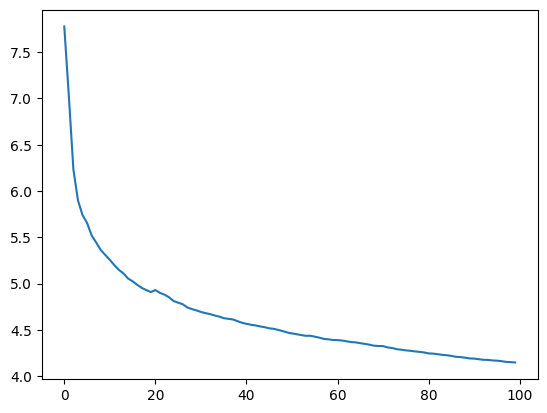

In [217]:
distorcoes = []
K = range(1,101)
for k in K: 
  modelo = KMeans(n_clusters=k,random_state=42,n_init='auto').fit(dataframe)
  distorcoes.append(sum(np.min(cdist(dataframe, modelo.cluster_centers_, 'euclidean'), axis=1)) / dataframe.shape[0])
  
plt.plot(distorcoes)

In [218]:
import math
x0 = K[0]
y0 = distorcoes[0]

x1 = K[len(K)- 1]
y1 = distorcoes[len(distorcoes)-1]

distancias = []
for i in range(len(distorcoes)):
  x = K[i]
  y = distorcoes[i]
  numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
  denominador = math.sqrt((y1-y0)**2 + (x1-x0)**2)
  distancias.append(numerador/denominador)

n_clusters_otimo = K[distancias.index(np.max(distancias))]
print('Numero ideal de clusters:', K[distancias.index(np.max(distancias))])

Numero ideal de clusters: 15


In [219]:
#Treinar o modelo definitivo
from pickle import dump
modelo = KMeans(n_clusters=n_clusters_otimo,random_state=42,n_init='auto').fit(dataframe)

dump(modelo,open('cluster1.modelo','wb'))

In [220]:
dados_num_desnormalizados = modelo_normalizador.inverse_transform(dados_num_normalizado)
dados_num_desnormalizados_DF = pd.DataFrame(dados_num_desnormalizados, columns= df_num.columns)
dados_num_desnormalizados_DF.head()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.0,100217.0,1995.0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.0,100220.0,1474.0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.0,100755.0,4862.0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.0,100880.0,1915.0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.0,100887.0,22831.0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [221]:
# dados_cat_normalizado
df_cat.columns[0].split('_')[1]

'arc'

In [222]:
desnormalizados_cat = df_cat.idxmax(axis=1).to_frame()

desnormalizados_cat['Kingdom'] = desnormalizados_cat[0].apply(lambda x: x.split('_')[1])
desnormalizados_cat = desnormalizados_cat.drop(0,axis=1)

df_desnorm = pd.concat([dados_num_desnormalizados_DF.reset_index(drop=True), desnormalizados_cat.reset_index(drop=True)], axis=1)

df_desnorm

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom
0,0.0,100217.0,1995.0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,vrl
1,0.0,100220.0,1474.0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,vrl
2,0.0,100755.0,4862.0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,vrl
3,0.0,100880.0,1915.0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,vrl
4,0.0,100887.0,22831.0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,vrl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0.0,9601.0,1097.0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638,pri
13024,1.0,9601.0,2067.0,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887,pri
13025,1.0,9602.0,1686.0,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017,pri
13026,0.0,9606.0,40662582.0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156,pri
